In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import yfinance as yf

# read data
df = pd.read_csv("data/prices/sp500.csv")
df = df.iloc[2:, 1:]

# keep only columns with full data
assets_full_data = (len(df) == (df == df).sum())
df = df.loc[:, (assets_full_data == True).values]

df

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
2,83.684799,28.299999,131.055862,80.349632,79.070488,89.492683,196.009995,86.802818,208.467331,367.459991,...,66.583618,86.077034,53.984043,56.649727,81.259521,100.103531,156.735718,252.089996,44.170757,137.399185
3,82.056877,28.379999,129.651367,79.257469,83.705162,88.970131,186.910004,85.250519,205.955887,366.089996,...,66.016754,84.016373,53.626354,56.157967,82.315361,98.463120,154.153183,247.259995,43.437874,137.329987
4,83.300011,28.790001,127.456856,79.633904,85.936325,90.576492,174.080002,85.667694,206.900131,370.000000,...,66.353027,85.169426,53.060005,56.502197,83.801331,99.264030,155.956985,248.550003,42.892906,140.938736
5,83.951172,29.840000,128.851593,79.153442,87.070045,91.515175,175.820007,86.511772,206.501007,369.279999,...,66.256950,88.983421,53.564411,57.043125,85.287300,100.402679,157.011688,247.809998,43.484852,142.402008
6,84.286629,30.469999,131.007095,81.033165,88.693550,92.686081,166.940002,86.143089,206.355026,374.290009,...,66.324211,89.850693,54.219254,57.052959,87.135002,101.647446,156.430130,251.990005,43.645771,141.363846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,139.320007,16.469999,231.509995,174.779999,136.889999,136.199997,295.869995,127.459999,353.579987,534.299988,...,69.660004,193.196960,75.959999,53.419998,105.019997,125.169998,123.019997,509.119995,67.820000,199.789993
503,141.029999,16.830000,234.800003,174.610001,137.000000,137.660004,301.350006,127.199997,353.420013,535.979980,...,68.489998,197.958267,80.830002,53.110001,104.919998,123.580002,123.989998,509.480011,69.050003,198.869995
504,144.240005,16.959999,236.679993,175.839996,138.619995,136.080002,307.959991,130.039993,359.470001,533.090027,...,69.589996,207.590652,80.620003,53.610001,104.180000,125.190002,121.709999,517.010010,69.300003,202.169998
505,141.789993,16.570000,232.490005,172.899994,140.729996,137.880005,290.519989,130.110001,345.549988,510.829987,...,69.470001,202.480011,79.680000,52.599998,91.650002,125.349998,121.269997,508.299988,68.900002,200.919998


In [2]:
PATTERN_LEN = 30
SAMPLES = 20000

ar = df.to_numpy()

# init empty list and get shape
ys_list = []
idxs = []
nrow, ncol = ar.shape

# sample N stock patterns
for _ in range(SAMPLES):

    # take random pattern
    i = np.random.randint(0, nrow - PATTERN_LEN)
    j = np.random.randint(0, ncol)
    y = ar[i:i+PATTERN_LEN, j].copy()

    # standardize pattern
    mn, sd = y.mean(), y.std()
    y -= mn
    y /= sd

    # append to list
    ys_list.append(y)
    idxs.append((i, j))

# convert to np array
ys_list = pd.DataFrame(ys_list)

ys_list

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.174328,-1.190736,-3.032581,-0.774934,0.731197,0.589507,0.235316,-0.734890,0.472473,-0.408415,...,-0.722571,-0.642502,0.296907,-0.066523,0.527915,0.574118,-0.811899,0.832842,-0.359122,1.464245
1,-0.920662,-1.487711,-1.533688,-1.554122,-0.828708,-0.123727,-0.236117,-1.656294,-0.925770,-0.609039,...,-0.032101,1.134516,1.334069,1.206152,1.738291,1.119166,1.554090,1.349419,1.262435,0.771226
2,1.995898,2.052013,1.889901,1.752723,1.324565,0.796641,0.773779,0.208447,-0.288303,-0.061747,...,0.106602,0.075250,-0.472438,-0.434813,-0.988770,0.020897,0.487057,-0.004189,-0.114980,-0.043905
3,-1.355712,-1.668829,-1.597298,-2.234328,-0.752423,-1.162715,-1.201851,-0.024966,0.343482,0.172080,...,-0.724082,-0.153183,-0.199071,0.768618,1.153266,1.552757,1.417794,1.660731,-0.099199,-0.558075
4,0.515038,1.116851,0.815946,0.792062,1.078640,0.940125,0.768178,0.252344,0.543696,-0.636043,...,1.040432,1.374774,0.715651,0.620122,0.448172,-0.287374,-1.175761,-1.772792,-1.648609,-1.954288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.491458,0.738694,1.254490,2.294601,2.946800,1.923743,0.696068,-1.034609,-0.621118,-0.088278,...,-0.455967,-0.567025,-0.806228,-0.477325,-0.690898,-0.673812,-1.092419,-0.233850,0.077971,0.663162
19996,-1.775711,-1.020309,-0.844806,-1.409458,-0.463290,-0.295427,-0.150448,0.147133,0.131757,-0.713888,...,0.862093,0.762150,0.293202,0.854402,0.370077,0.016441,-0.698515,-1.451915,-1.328905,-0.921459
19997,1.661833,2.538776,2.064646,1.072802,0.654141,0.821209,0.487734,0.433585,0.262555,0.795456,...,-0.377323,-0.540429,-0.813153,-0.760985,-0.631558,-0.331100,-1.132101,-1.051538,-1.231153,-0.982202
19998,1.543632,1.323321,1.658442,1.981151,2.027696,0.665491,0.839260,-0.218853,-0.836343,-0.144379,...,-1.317303,-1.748990,-0.792442,-0.789335,-0.500507,-0.307953,-0.096767,-0.255157,-0.283110,-0.354539


In [3]:
_n_clusters = 100

clust = KMeans(n_clusters=_n_clusters)
clust.fit(ys_list)

ys_list.loc[:, "cluster"] = clust.labels_

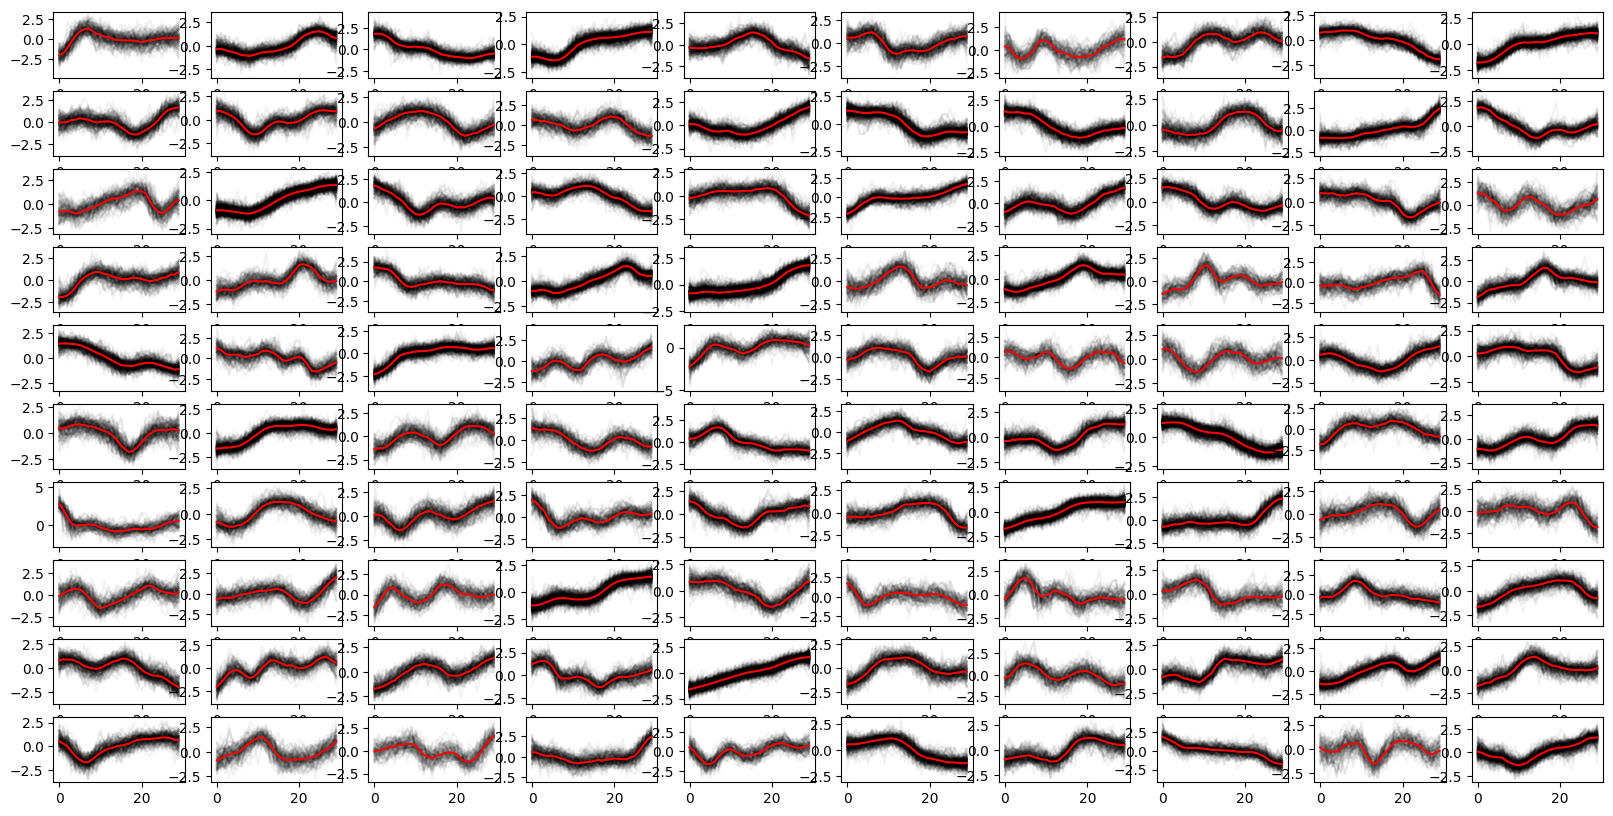

In [4]:
ncols = 10
nrows = int(np.ceil(_n_clusters // ncols))

fig, axs = plt.subplots(nrows, ncols, figsize=(ncols*2,nrows))

for cluster_id in range(_n_clusters):
    row = cluster_id // ncols
    col = cluster_id % ncols

    plot_df = ys_list.loc[ys_list.loc[:, "cluster"] == cluster_id, :].iloc[:,:-1].T

    for c in plot_df.columns:
        axs[row, col].plot(plot_df.loc[:, c], color='black', alpha=0.05)

    _mn = plot_df.mean(axis=1)
    axs[row, col].plot(_mn, color='red')

plt.show()

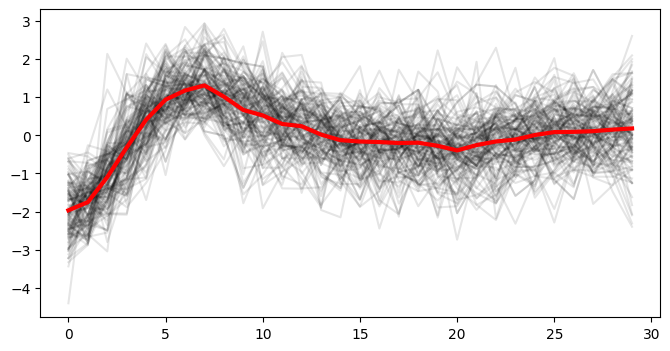

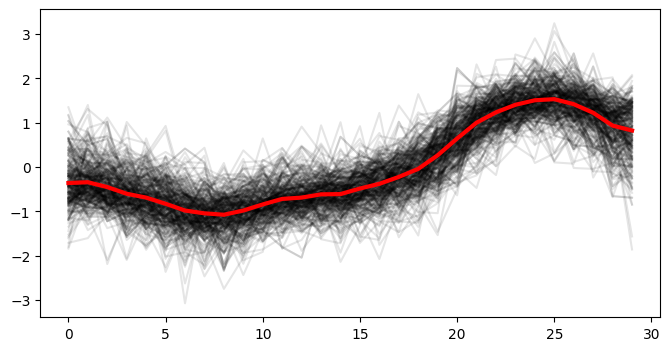

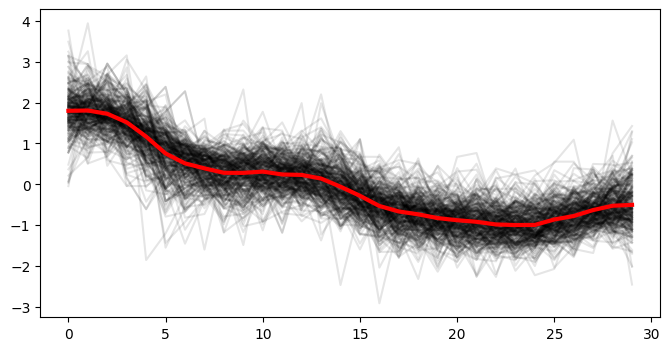

In [5]:
for i in range(3):
    fig, axs = plt.subplots(figsize=(8, 4))

    plot_df = ys_list.loc[ys_list.loc[:, "cluster"] == i, :].iloc[:,:-1].T

    for c in plot_df.columns:
        axs.plot(plot_df.loc[:, c], color='black', alpha=0.1)

    _mn = plot_df.mean(axis=1)
    axs.plot(_mn, color='red', linewidth=3)

    plt.show()